In [1]:
import numpy as np
import matplotlib.pyplot as plt

Read VLA-COSMOS  data

In [2]:
d = np.genfromtxt('vla_cosmos.dat.gz', dtype=None,
                  names=['VLA', 'RA', 'DEC', 'Multi', 'CatCtp', 'Ctp',
                         'RAc', 'DECc', 'Sep', 'Pfalse', 'zbest', 'F3GHz',
                         'logL10cm', 'logL21cm', 'logLTIRSF', 'SFR', 'XrayAGN',
                         'MIRAGN', 'SEDAGN', 'QMLAGN', 'SFG', 'CleanSFG',
                         'HLAGN', 'MLAGN', 'RExcess', 'flagC15'])

/home/alonso/.local/lib/python3.6/site-packages/ipykernel-4.8.2-py3.6.egg/ipykernel_launcher.py:6: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  


Compute flux at 144 GHz

In [3]:
alpha = -0.7
flux_144 = 10.**(-3+np.log10(d['F3GHz'])+alpha*np.log10(144./3000.))

Compute redshift distributions for different flux cuts

In [4]:
def get_nz(flux_cut, nb=40, zmax=10, use_b=False):
    mask  = flux_144 >= flux_cut
    z = d[mask]['zbest']
    nz, zb = np.histogram(z, bins=nb, range=[0, zmax], density=True)
    # Add zero
    zb[1:] = 0.5 * (zb[1:] + zb[:-1])
    nz = np.concatenate((np.array([0]), nz))
    return zb, nz

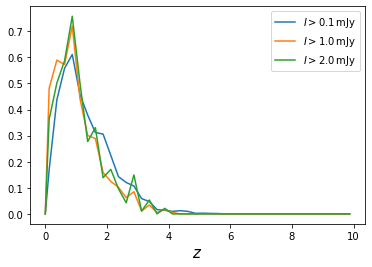

In [5]:
plt.figure()
for fluxcut in [0.1, 1.0, 2.0]:
    zs, nz = get_nz(fluxcut)
    plt.plot(zs, nz,
             label=r'$I>%.1lf\,{\rm mJy}$' % fluxcut)
    np.savez('nz_vlacos_flux%.3lf' % fluxcut,
             zs=zs, nz=nz)
plt.xlabel('$z$', fontsize=15)
plt.legend(loc='upper right')
plt.show()